### filter comparison

options:
- EPIC allfilts (phyllis is familiar with and is gold standard) 
- vtools (hydrographic toolset with lanzcos and other filters 
- hand code lanzcos from matlab script found online
- ferret?


In [1]:
import pandas as pd
import lanzcos

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates


In [2]:
#raw data
data=pd.read_csv('data/06bsp5b_wcp_vel_50.csv',parse_dates=True,index_col='time')
#filtered by allfilts data
data_f35=pd.read_csv('data/06bsp5b_wcp_vel_50_f35.csv',parse_dates=True,index_col='time')

In [3]:
#filter data with rudimentary matlab script
data['ufdata'] = lanzcos.lanzcos(data.U_320.values,1,35)
data['vfdata'] = lanzcos.lanzcos(data.V_321.values,1,35)

<AxesSubplot:xlabel='time'>

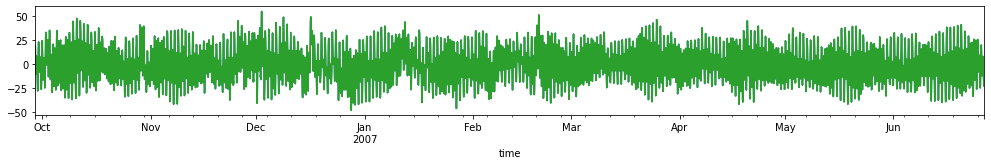

In [4]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(17, 2))

data.U_320.plot()
data.ufdata.plot()
data_f35.U_320.plot()

(324336.0, 325080.0)

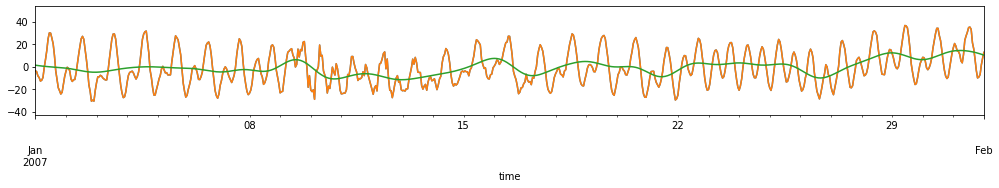

In [5]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(17, 2))
ax = data.V_321.plot()
data_f35.V_321.plot()
data.vfdata.plot()
ax.set_xlim(['01-2007','2-2007'])

In [6]:
# Import VTools and numpy array creation function
# This is python 2.7 only
from vtools.data.api import *
import datetime as dtm
import numpy as np

from vtools.functions.filter import *


ModuleNotFoundError: No module named 'vtools'

(732555.0, 732889.0)

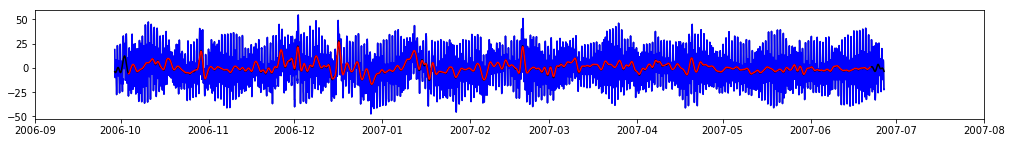

In [7]:
cf = 1./35./0.5 #35hour filter

ts=rts(data.U_320.values,data.index[0].to_pydatetime(),hours(1))
ts_cos=cosine_lanczos(ts,cutoff_frequency=cf,filter_len=hours(59))

fig, ax = plt.subplots(figsize=(17, 2))
ax.plot(data.index,data.U_320,'grey')
ax.plot(data_f35.index,data_f35.U_320,'b')
ax.plot(data.index,data.ufdata,'k')
ax.plot(ts_cos.times,ts_cos.data,'r')

ax.set_xlim(['09-2006','8-2007'])

In [8]:
fig.savefig('allfilts.svg')

(732585.0, 732616.0)

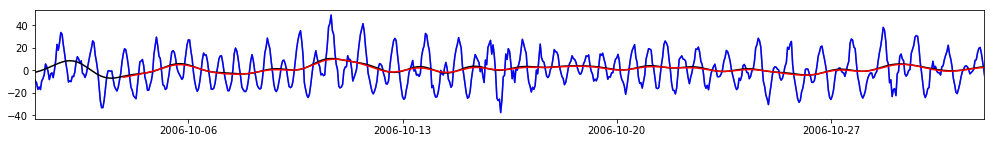

In [9]:
ts=rts(data.V_321.values,data.index[0].to_pydatetime(),hours(1))
ts_cos=cosine_lanczos(ts,cutoff_frequency=cf,filter_len=hours(59))

fig, ax = plt.subplots(figsize=(17, 2))
ax.plot(data.index,data.V_321,'grey')
ax.plot(data_f35.index,data_f35.V_321,'b')
ax.plot(data.index,data.vfdata,'k')
ax.plot(ts_cos.times,ts_cos.data,'r')

ax.set_xlim(['10-2006','11-2006'])

In [10]:
#from allfilts
t=[0.0569,0.0566,0.0556,0.0539,0.0517,0.0490,0.0457,0.0421,0.0381
,0.0339,0.0295,0.0250,0.0206,0.0163,0.0121,0.0083,0.0047,0.0015
,-0.0014,-0.0037,-0.0057,-0.0072,-0.0083,-0.0089,-0.0092,-0.0091,-0.0087
,-0.0081,-0.0073,-0.0063,-0.0053,-0.0041,-0.0030,-0.0019,-0.0009,0.0000
,0.0008,0.0015,0.0020,0.0023,0.0026,0.0027,0.0026,0.0025,0.0023
,0.0021,0.0018,0.0014,0.0011,0.0008,0.0005,0.0003,0.0001,-0.0001
,-0.0002,-0.0002,-0.0002,-0.0002,-0.0002,-0.0001]

In [11]:
s = t[::-1][:-1] + t

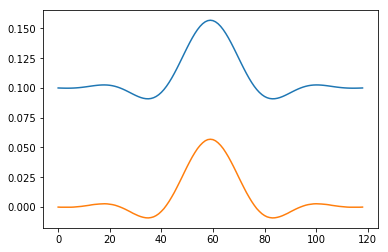

In [12]:
plt.plot(lowpass_cosine_lanczos_filter_coef(cf,59)+.1)
plt.plot(s)